In [336]:
from PIL import Image
from numpy import *
import numpy as np
from pylab import *
import os 
from scipy.cluster.vq import *
from sqlite3 import dbapi2 as sqlite
import matplotlib.pyplot as plt

In [337]:
import pickle
import sift
import imagesearch
imagesearch = reload(imagesearch)

In [338]:
with open('caltech_imlist.pkl', 'rb') as f:
    imlist = pickle.load(f)
    featlist = pickle.load(f)

In [339]:
nbr_images = len(imlist)

In [340]:
with open('vocabulary.pkl', 'rb') as f:
    voc = pickle.load(f)

In [341]:
db = 'test.db'
con = sqlite.connect(db)

In [342]:
tmp = con.execute("select wordid from imwords").fetchall()
word_list = [w[0] for w in set(tmp)]
target = word_list[40]

In [343]:
id = 73
locs, descr  = sift.read_features_from_file(featlist[id])
iw = voc.project(descr)

[   0.    0.    0.    0.   24.   97.   34.    3.   36.    0.    0.    0.
    4.   46.   99.  109.   21.    0.    3.    0.    0.    0.    4.   41.
    0.    0.    2.    1.    0.    0.    3.    1.    7.    3.    0.    1.
  143.  143.   10.    4.  143.   27.    0.    1.   48.   52.   29.   80.
  135.    3.    0.    0.    0.    0.    1.   26.    0.    0.    0.    0.
    0.    0.    6.    3.   16.    6.    0.    1.  143.  132.    0.    1.
  143.   43.    0.    1.   20.   10.    0.   15.  143.   11.    0.    0.
    0.    0.    0.    8.    1.    0.    0.    0.    0.    0.    0.    0.
   29.   12.    0.    0.   72.   69.    1.    0.  143.  100.    0.    0.
    2.    0.    0.    0.   66.   30.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    1.    1.    0.    0.]
[ 246.474     52.3699     1.19348    6.16868]


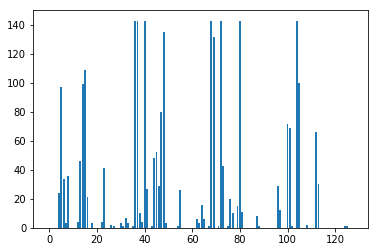

In [344]:
target = 369
words, distance = vq(descr, voc.voc)
index = np.where(words==target)
print descr[index[0][0]]
print locs[index[0][0]]
figure()
plt.bar(range(128), descr[index[0][0]])
show()

In [345]:
id_list = con.execute("select rowid from imlist").fetchall()
id_list = [i[0] for i in id_list]

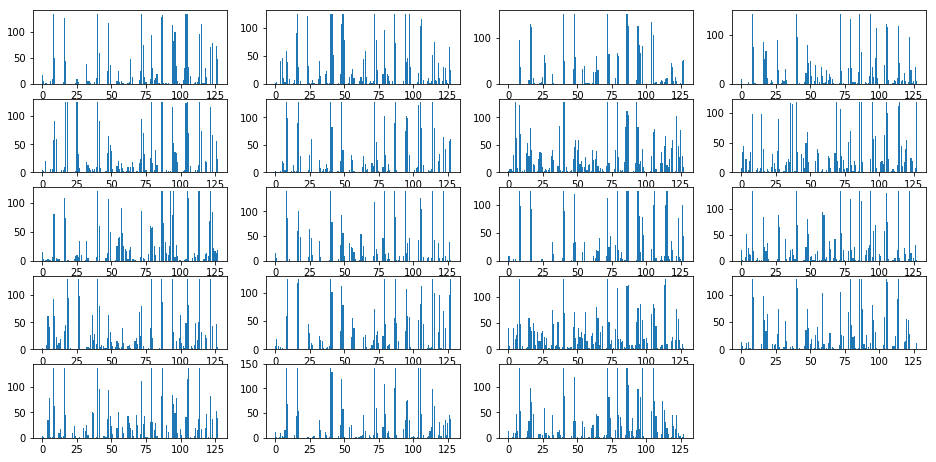

In [346]:
target_word = 45
cnt=1
figure(figsize=(16, 16))
for id in id_list[:80]:
    locs, descr  = sift.read_features_from_file(featlist[id-1])
    words, distance = vq(descr, voc.voc)
    index = np.where(words==target_word)
    if len(index[0])<=0:
        continue
    subplot(10, 4, cnt)
    d = descr[index][0]
    l = range(128)
    plt.bar(l, d)
    cnt+=1
show()

1 : [ 260.366      16.2702      0.944967    6.11679 ]
3 : [ 50.5488   18.7735    1.12843   3.96347]
15 : [ 228.456      47.6591      0.937656    6.08131 ]
30 : [ 266.872     66.2148     1.31523    1.71622]
32 : [ 78.7353   89.0433    1.15863   5.78077]
35 : [  75.8466   153.086      1.11213    1.05926]
37 : [ 266.812     48.6936     1.13796    2.02118]
42 : [ 134.362    117.231      1.09622    5.33781]
43 : [ 143.345    119.231      1.02152    2.12856]
46 : [  85.4556    210.34        0.998186    1.2156  ]
49 : [  54.8159   164.446      1.10709    5.45106]
54 : [ 100.914     118.207       0.917513    3.13865 ]
57 : [ 109.477     167.533       0.903172    5.54998 ]
58 : [  69.5916   239.319      1.37062    5.74288]
68 : [ 215.675     75.6031     1.04391    1.36544]
71 : [  84.2096   165.022      1.11689    1.87105]
74 : [  92.4025    196.353       0.814783    0.420242]
77 : [  28.2653    211.337       0.943219    4.60741 ]
80 : [  68.5352    120.076       0.911099    2.63911 ]


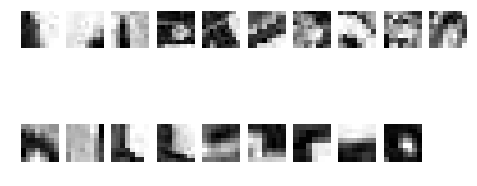

In [332]:
target_word = 45
cnt=0
figure(figsize=(8, 8))
gray()
for id in id_list[:80]:
    locs, descr  = sift.read_features_from_file(featlist[id-1])
    words, distance = vq(descr, voc.voc)
    index = np.where(words==target_word)
    if len(index[0])<=0:
        continue
    print id, ':', locs[id]
    scale = uint(locs[id][2]*4+0.5)
    im = array(Image.open(imlist[id-1]).convert('L'))
    y1 = locs[id][1]-scale  # locs is x, y, scale, angle
    x1 = locs[id][0]-scale
    y2 = y1 + scale*2
    x2 = x1 + scale*2
    y1 = y1 if (0<=y1) else 0
    x1 = x1 if (0<=x1) else 0
    y2 = y2 if (y2<im.shape[0]) else im.shape[0]  # shape is ysize, xsize
    x2 = x2 if (x2<im.shape[1]) else im.shape[1]
    x1 = int(x1)
    x2 = int(x2)
    y1 = int(y1)
    y2 = int(y2)
    imsmall = im[y1:y2, x1:x2]
    if x2-x1<scale*2:
        imsmall = hstack((imsmall, zeros((imsmall.shape[0], int(scale*2-(x2-x1))))))
    if y2-y1<scale*2:
        imsmall = vstack((imsmall, zeros((int(scale*2-(y2-y1)), imsmall.shape[1]))))
    subplot(4, 10, cnt+1)
    imshow(imsmall)
    axis('off')
    cnt = cnt+1
show()